C:\Users\Razer\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 Dissen
(52.115769, 8.2034345)
17592


C:\Users\Razer\anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


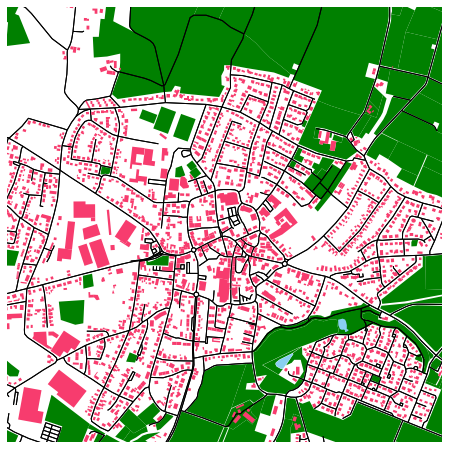

In [26]:
import osmnx as ox
import pandas as pd
import numpy as np
import time

ox.config(log_console=True, use_cache=True)

bgcolor = 'w'
edge_color = 'black'
bldg_color = '#F4FF6E'
sand_color = '#fddf77'
#point = (45.5016889, -73.567256)
dist = 1000
dpi = 48

#load data, add new column and set up types
data = pd.read_csv("osmos_data/all-cities-n-towns.csv",sep=';', header = 0, names=['name','place','lat','lon', 'map'])
data["map"] = np.nan
required_data = data[["name","place","lat","lon","map"]]
required_data = required_data.astype({"name": str, "place": str, "lat":float, "lon":float,"map":str})

length_all = len(required_data.index)
batch_size = int(length_all/10)

#for x in range(10):
for x in range(87975, batch_size):
    try:
        place = required_data.iloc[x].loc['name']
        #file = './maps_data/' + place + '.png'
        file = 'D:/MapsData/' + place + '.png'
        place_point = tuple(required_data.iloc[x].loc['lat':'lon'].tolist())
        print(place)
        print(place_point)
        print(x)

        bbox = ox.utils_geo.bbox_from_point(place_point, dist=dist)
        fp = ox.geometries_from_point(place_point, tags={'building':True}, dist=dist)
        G = ox.graph_from_point(place_point, network_type='walk', dist=dist, truncate_by_edge=True, retain_all=True)
        natural = ox.geometries_from_point(place_point, tags={'natural':['tree','wood','grassland','tree_row','scrub','peak','wetland']}, dist = dist)
        sandy = ox.geometries_from_point(place_point, tags={'natural':['sand','coastline','beach']}, dist = dist)
        landuse = ox.geometries_from_point(place_point, tags={'landuse':['meadow','forest','orchard','farmland','vineyard','farmyard','recreation_ground', 'allotments','reservoir','greenfield','plant_nursery','grass']}, dist = dist)#natural_greens = natural[natural["natural"].isin(["tree","wood","grassland","tree_row","scrub","peak"])]
        leisure = ox.geometries_from_point(place_point, tags={'leisure':["pitch","park","playground"]}, dist=dist)
        waterways = ox.geometries_from_point(place_point, tags={'natural':["water"]}, dist=dist)

        fig, ax = ox.plot_footprints(leisure, bgcolor=bgcolor, bbox=bbox, color='green',show=False)
        fig, ax = ox.plot_footprints(natural, ax=ax, bgcolor=bgcolor, bbox=bbox, color='green', show=False)
        fig, ax = ox.plot_footprints(landuse, ax=ax, bgcolor=bgcolor, bbox=bbox, color='green', show=False)
        fig, ax = ox.plot_footprints(waterways, ax=ax, bgcolor=bgcolor, bbox=bbox, color='#89cff0', show=False)
        fig, ax = ox.plot_footprints(sandy, ax=ax, bgcolor=bgcolor, bbox=bbox, color=sand_color, show=False)
        fig, ax = ox.plot_graph(G, ax=ax,bgcolor=bgcolor, node_size=0, edge_color=edge_color, show=False)
        fig, ax = ox.plot_footprints(fp, ax=ax, bbox=bbox, color='#F73C6E', save=False, show=True, filepath=file, dpi = dpi)
        required_data.at[x, 'map'] = file
    except Exception as e:
        print(e)
required_data.to_csv('D:/MapsDataCsvs/map_batch1.csv')

In [21]:
#this one in the morning!
clean = required_data['map'] != 'nan'
clean_df1 = required_data[clean]
clean_df1.to_csv('D:/MapsDataCsvs/map_batch1_17445_clean_to_end.csv')

C:\Users\Razer\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1]:
#this one in the morning!
clean = required_data['map'] != 'nan'
clean_df1 = required_data[clean]
clean_df1.to_csv('D:/MapsDataCsvs/map_batch1_7506_to_7758.csv')

NameError: name 'required_data' is not defined

In [23]:
test = pd.read_csv("df_data/map_batch1.csv",sep=';', header = 0, names=['name','place','lat','lon', 'map'])

C:\Users\Razer\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,place,lat,lon,map
0,London,city,51.507322,-0.127647,./maps_data/ London.png
1,Penkridge,town,52.724663,-2.112756,./maps_data/ Penkridge.png
2,St Ives,town,52.335816,-0.075387,./maps_data/ St Ives.png
3,Haslemere,town,51.087606,-0.709777,./maps_data/ Haslemere.png
4,Petersfield,town,51.002494,-0.939203,./maps_data/ Petersfield.png
...,...,...,...,...,...
175933,Palmalmal,town,-5.631392,151.494035,nan
175934,Gumine,town,-6.188268,144.919834,nan
175935,Mendi,town,-6.139358,143.657860,nan
175936,Torokina,town,-6.205808,155.067269,nan


In [ ]:
 Anttola
(61.5840144, 27.6456221)
4929 - problematic one!!!

In [301]:
current_cities_lonlat
#current_unique_finds
#only_cities.drop(['index_col', 'filename_index'], axis=1)
#current_index_finds.drop(['index_col', 'filename_index'], axis=1)
frames = [current_cities_lonlat, current_index_finds,current_unique_finds]
all_current = pd.concat(frames)


In [317]:
#all_current['just_exists'] = all_current['exists_lonlat'] | all_current['exists_index'] | all_current['exists']
#all_current['exists_lonlat'] = all_current['exists_lonlat'].fillna(False, inplace=True)
all_current
#all_current = all_current.drop(['exists_lonlat','exists','exists_index'], axis=1)

,name,place,lat,lon,map,just_exists
21642,Aba,city,5.112735,7.364349000000002,nan,True
155771,Aberdeen,city,45.4649805,-98.487813,nan,True
154802,Aberdeen,city,46.975371,-123.815722,nan,True
95939,Akbarpur,city,26.4200687,82.5382541,nan,True
33598,Akbarpur,city,26.4200687,82.5382541,nan,True
...,...,...,...,...,...,...
174586,Lismore,city,-28.8078,153.279,NaN,True
174629,Horsham,city,-36.7148,142.202,NaN,True
174751,Launceston,city,-41.4341,147.137,NaN,True
175133,Christchurch,city,-43.531,172.637,NaN,True


In [320]:
#without the just exists column!
#all_current_copy = all_current.drop(['just_exists'], axis=1)
only_cities

,name,place,lat,lon,map
0,London,city,51.507322,-0.127647,NaN
14,Wells,city,51.209451,-2.645120,NaN
17,Leeds,city,53.797419,-1.543794,NaN
18,Αθήνα,city,37.983941,23.728305,NaN
27,Bath,city,51.381386,-2.359696,NaN
...,...,...,...,...,...
175800,Grafton,city,-29.691250,152.933344,NaN
175803,Karratha,city,-20.737007,116.847859,NaN
175872,Joondalup,city,-31.743077,115.772118,NaN
175882,Hibiscus Coast,city,-36.609534,174.708624,NaN


In [328]:
#end_all = [only_cities, all_current_copy]
#concatenated = pd.concat(end_all)
#concatenated.sort_index()
to_download_cities = only_cities.drop(all_current_copy.index)
to_download_cities.to_csv('D:/MapsDataCsvs/last_batch_cities.csv')

,name,place,lat,lon,map
0,London,city,51.507322,-0.127647,NaN
48,Lincoln,city,53.233630,-0.539217,NaN
122,Portsmouth,city,50.803683,-1.075614,NaN
137,Gloucester,city,51.865370,-2.245819,NaN
142,Birmingham,city,52.479699,-1.902691,NaN
...,...,...,...,...,...
175703,Kolohaumbi,city,-9.915433,160.550602,NaN
175704,Marakuru,city,-9.916895,160.575802,NaN
175803,Karratha,city,-20.737007,116.847859,NaN
175872,Joondalup,city,-31.743077,115.772118,NaN


In [3]:
import pandas as pd
test = pd.read_csv("D:/MapsDataCsvs/duplicate_cities.csv",sep=',', header = 0, names=['name','place','lat','lon', 'map'])
#test['count'].sum()

,name,place,lat,lon,map
0,London,city,51.507322,-0.127647,NaN
48,Lincoln,city,53.233630,-0.539217,NaN
122,Portsmouth,city,50.803683,-1.075614,NaN
137,Gloucester,city,51.865371,-2.245819,NaN
142,Birmingham,city,52.479699,-1.902691,NaN
...,...,...,...,...,...
175703,Kolohaumbi,city,-9.915433,160.550602,NaN
175704,Marakuru,city,-9.916895,160.575802,NaN
175803,Karratha,city,-20.737007,116.847859,NaN
175872,Joondalup,city,-31.743077,115.772118,NaN


In [122]:
import pandas as pd
all_data = pd.read_csv("osmos_data/all-cities-n-towns.csv",sep=';', header = 0, names=['name','place','lat','lon', 'map'])
only_cities = all_data.loc[all_data['place'].str.strip() == 'city']
only_cities.to_csv('D:/MapsDataCsvs/only_cities.csv')

In [159]:
only_cities

,name,place,lat,lon,map,index_col,filename_index
0,London,city,51.507322,-0.127647,NaN,0,D:/MapsDataCities/ London_0.png
14,Wells,city,51.209451,-2.645120,NaN,14,D:/MapsDataCities/ Wells_14.png
17,Leeds,city,53.797419,-1.543794,NaN,17,D:/MapsDataCities/ Leeds_17.png
18,Αθήνα,city,37.983941,23.728305,NaN,18,D:/MapsDataCities/ Αθήνα_18.png
27,Bath,city,51.381386,-2.359696,NaN,27,D:/MapsDataCities/ Bath_27.png
...,...,...,...,...,...,...,...
175800,Grafton,city,-29.691250,152.933344,NaN,175800,D:/MapsDataCities/ Grafton_175800.png
175803,Karratha,city,-20.737007,116.847859,NaN,175803,D:/MapsDataCities/ Karratha_175803.png
175872,Joondalup,city,-31.743077,115.772118,NaN,175872,D:/MapsDataCities/ Joondalup_175872.png
175882,Hibiscus Coast,city,-36.609534,174.708624,NaN,175882,D:/MapsDataCities/ Hibiscus Coast_175882.png


In [125]:
#check how many cities found in only cities folder - NAME ONLY!!
only_cities_csv = pd.read_csv("D:/MapsDataCsvs/only_cities.csv",sep=',', header = 0, names=['name','place','lat','lon', 'map'])
only_cities_csv['filename'] = 'D:/MapsDataCities/' + only_cities_csv['name'] + '.png'
only_cities_csv['exists'] = only_cities_csv['filename'].map(os.path.isfile)
only_cities_csv.loc[only_cities_csv['exists']]

,name,place,lat,lon,map,filename,exists
0,London,city,51.507322,-0.127647,NaN,D:/MapsDataCities/ London.png,True
48,Lincoln,city,53.233630,-0.539217,NaN,D:/MapsDataCities/ Lincoln.png,True
122,Portsmouth,city,50.803683,-1.075614,NaN,D:/MapsDataCities/ Portsmouth.png,True
137,Gloucester,city,51.865371,-2.245819,NaN,D:/MapsDataCities/ Gloucester.png,True
142,Birmingham,city,52.479699,-1.902691,NaN,D:/MapsDataCities/ Birmingham.png,True
...,...,...,...,...,...,...,...
175256,Timika,city,-4.548105,136.889884,NaN,D:/MapsDataCities/ Timika.png,True
175272,Sentani,city,-2.566079,140.505743,NaN,D:/MapsDataCities/ Sentani.png,True
175378,Warwick,city,-28.216320,152.032704,NaN,D:/MapsDataCities/ Warwick.png,True
175523,Jayapura,city,-2.538754,140.703739,NaN,D:/MapsDataCities/ Jayapura.png,True


In [15]:
#check how many cities found in only cities folder - NAME + INDEX!!
only_cities_csv = pd.read_csv("D:/MapsDataCsvs/only_cities.csv",sep=',', header = 0, names=['name','place','lat','lon', 'map'])
only_cities_csv['index_col'] = only_cities_csv.index
only_cities_csv['index_col'] = only_cities_csv['index_col'].map(str)
only_cities_csv['filename_index'] = 'D:/MapsData/' + only_cities_csv['name'] + '_' + only_cities_csv['index_col']  + '.png'
only_cities_csv['exists_index'] = only_cities_csv['filename_index'].map(os.path.isfile)
only_cities_csv.loc[only_cities_csv['exists_index']]

NameError: name 'os' is not defined

In [226]:
current_index_finds = only_cities_csv.loc[only_cities_csv['exists_index']]

In [23]:
#check how many cities found in only cities folder - NAME + LONLAT!!
only_cities_csv = pd.read_csv("D:/MapsDataCsvs/only_cities.csv",sep=',', header = 0, names=['name','place','lat','lon', 'map'])
only_cities_csv['lonlat'] = only_cities_csv['lat'].astype(str) + '_' + only_cities_csv['lon'].astype(str)
only_cities_csv['filename_lonlat'] = 'D:/MapsData/' + only_cities_csv['name'] + '_' + only_cities_csv['lonlat'] + '.png'
#only_cities_csv['exists_lonlat'] = only_cities_csv['filename_lonlat'].map(os.path.isfile)
#only_cities_csv.loc[only_cities_csv['exists_lonlat']]
only_cities_csv[only_cities_csv.duplicated('filename_lonlat')]

,name,place,lat,lon,map,lonlat,filename_lonlat
19875,Melilla,city,35.291903,-2.940715,NaN,35.2919028_-2.9407146,D:/MapsData/ Melilla_35.2919028_-2.9407146.png
19887,Ceuta,city,35.888361,-5.304138,NaN,35.888360999999996_-5.304138,D:/MapsData/ Ceuta_35.888360999999996_-5.30413...
28095,Pointe-Noire,city,-4.797537,11.850330,NaN,-4.7975373_11.8503297,D:/MapsData/ Pointe-Noire_-4.7975373_11.850329...
28797,Hakkâri,city,37.574898,43.737660,NaN,37.574898_43.73766,D:/MapsData/ Hakkâri_37.574898_43.73766.png
28798,Iğdır,city,39.921567,44.046772,NaN,39.921566799999994_44.0467724,D:/MapsData/ Iğdır_39.921566799999994_44.04677...
...,...,...,...,...,...,...,...
175272,Sentani,city,-2.566079,140.505743,NaN,-2.566079_140.5057435,D:/MapsData/ Sentani_-2.566079_140.5057435.png
175338,Wamena,city,-4.094371,138.946657,NaN,-4.0943705_138.9466574,D:/MapsData/ Wamena_-4.0943705_138.9466574.png
175523,Jayapura,city,-2.538754,140.703739,NaN,-2.5387539_140.7037389,D:/MapsData/ Jayapura_-2.5387539_140.7037389.png
175524,Manokwari,city,-0.861446,134.076732,NaN,-0.8614456_134.0767324,D:/MapsData/ Manokwari_-0.8614456_134.0767324.png


In [179]:
import os
unique_cities = only_cities[only_cities.duplicated('name',keep=False)]
#unique_cities.to_csv('D:/MapsDataCsvs/unique_cities.csv')
unique_cities['name'].nunique()

5865

In [137]:
import os
unique_cities_csv = pd.read_csv("D:/MapsDataCsvs/unique_cities.csv",sep=',', header = 0, names=['name','place','lat','lon', 'map'])
unique_cities_csv['filename'] = 'D:/MapsData/' + unique_cities_csv['name'] + '.png'
unique_cities_csv['exists'] = unique_cities_csv['filename'].map(os.path.isfile)

#unique_cities_csv.loc[unique_cities_csv['exists']]

,name,place,lat,lon,map,filename,exists
0,London,city,51.507322,-0.127647,NaN,D:/MapsData/ London.png,True
48,Lincoln,city,53.233630,-0.539217,NaN,D:/MapsData/ Lincoln.png,True
122,Portsmouth,city,50.803683,-1.075614,NaN,D:/MapsData/ Portsmouth.png,True
137,Gloucester,city,51.865371,-2.245819,NaN,D:/MapsData/ Gloucester.png,True
142,Birmingham,city,52.479699,-1.902691,NaN,D:/MapsData/ Birmingham.png,True
...,...,...,...,...,...,...,...
175256,Timika,city,-4.548105,136.889884,NaN,D:/MapsData/ Timika.png,True
175272,Sentani,city,-2.566079,140.505743,NaN,D:/MapsData/ Sentani.png,True
175378,Warwick,city,-28.216320,152.032704,NaN,D:/MapsData/ Warwick.png,True
175523,Jayapura,city,-2.538754,140.703739,NaN,D:/MapsData/ Jayapura.png,True


In [231]:
#THESE I GOT FOR SURE!!! 
dropped_all_duplicated_occurence = only_cities.drop_duplicates(subset = ["name"], keep=False)
dropped_all_duplicated_occurence['filename'] = 'D:/MapsData/' + dropped_all_duplicated_occurence['name'] + '.png'
dropped_all_duplicated_occurence['filename_new'] = 'D:/MapsDataCities/' + dropped_all_duplicated_occurence['name'] + '.png'
dropped_all_duplicated_occurence['exists'] = dropped_all_duplicated_occurence['filename'].map(os.path.isfile)
#dropped_all_duplicated_occurence.apply(lambda x: shutil.copy(x.filename, x.filename_new), axis=1)

<ipython-input-231-9d31aa15b317>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_all_duplicated_occurence['filename'] = 'D:/MapsData/' + dropped_all_duplicated_occurence['name'] + '.png'
<ipython-input-231-9d31aa15b317>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_all_duplicated_occurence['filename_new'] = 'D:/MapsDataCities/' + dropped_all_duplicated_occurence['name'] + '.png'
<ipython-input-231-9d31aa15b317>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [234]:
current_unique_finds = dropped_all_duplicated_occurence.loc[dropped_all_duplicated_occurence['exists']]
#unique_cities_found.to_csv('D:/MapsDataCsvs/unique_cities_found.csv')
#unique_cities_found['filename_new'] = 'D:/MapsDataCities/' + unique_cities_found['name'] + '.png'
#unique_cities_found.apply(lambda x: shutil.copy(x.filename, x.filename_new), axis=1)

In [178]:
#NAME ONLY - CITIES FOUND!!!!
unique_cities_found_csv = pd.read_csv("D:/MapsDataCsvs/unique_cities_found.csv",sep=',', header = 0, names=['name','place','lat','lon', 'map', 'filename','exists'])
unique_cities_found_csv['name'].nunique()

3980

In [140]:
unique_cities_found_csv = pd.read_csv("D:/MapsDataCsvs/unique_cities_found.csv",sep=',', header = 0, names=['name','place','lat','lon', 'map','filename','exists'])
unique_cities_found_csv['filename_new'] = 'D:/MapsDataCities/' + unique_cities_found_csv['name'] + '.png'
#unique_cities_found_csv
unique_cities_found_csv.apply(lambda x: shutil.copy(x.filename, x.filename_new), axis=1)

0             D:/MapsDataCities/ London.png
48           D:/MapsDataCities/ Lincoln.png
122       D:/MapsDataCities/ Portsmouth.png
137       D:/MapsDataCities/ Gloucester.png
142       D:/MapsDataCities/ Birmingham.png
                        ...                
175256        D:/MapsDataCities/ Timika.png
175272       D:/MapsDataCities/ Sentani.png
175378       D:/MapsDataCities/ Warwick.png
175523      D:/MapsDataCities/ Jayapura.png
175524     D:/MapsDataCities/ Manokwari.png
Length: 8197, dtype: object

In [154]:
#unique cities duplicate check
city_name_duplicates = unique_cities_found_csv[unique_cities_found_csv.duplicated('filename_new',keep='first')].sort_values(by=['name'], ascending=False)
city_name_duplicates
#city_name_duplicates['exists_duplicated'] = city_name_duplicates['filename_new'].map(os.path.isfile)
#city_name_duplicates.loc[city_name_duplicates['exists']]

,name,place,lat,lon,map,filename,exists,filename_new
96624,회령시,city,42.434280,129.754247,NaN,D:/MapsData/ 회령시.png,True,D:/MapsDataCities/ 회령시.png
96770,혜산시,city,41.402945,128.177837,NaN,D:/MapsData/ 혜산시.png,True,D:/MapsDataCities/ 혜산시.png
96616,해주시,city,38.040114,125.714009,NaN,D:/MapsData/ 해주시.png,True,D:/MapsDataCities/ 해주시.png
96619,함흥시,city,39.915463,127.543979,NaN,D:/MapsData/ 함흥시.png,True,D:/MapsDataCities/ 함흥시.png
98675,포항시,city,36.018932,129.342938,NaN,D:/MapsData/ 포항시.png,True,D:/MapsDataCities/ 포항시.png
...,...,...,...,...,...,...,...,...
89500,,city,-1.007470,116.725701,NaN,D:/MapsData/ .png,True,D:/MapsDataCities/ .png
67042,,city,31.904603,44.488897,NaN,D:/MapsData/ .png,True,D:/MapsDataCities/ .png
94456,,city,28.117987,112.983693,NaN,D:/MapsData/ .png,True,D:/MapsDataCities/ .png
51782,,city,34.930700,43.493107,NaN,D:/MapsData/ .png,True,D:/MapsDataCities/ .png


In [192]:
#duplicates resolved with adding index
import os
all_cities_index = pd.read_csv("osmos_data/all-cities-n-towns.csv",sep=';', header = 0, names=['name','place','lat','lon', 'map'])
all_cities_index = all_cities_index = all_cities_index.loc[all_cities_index['place'].str.strip() == 'city']
all_cities_index['index_col'] = all_cities_index.index
all_cities_index['index_col'] = all_cities_index['index_col'].map(str)
all_cities_index['filename'] = 'D:/MapsData/' + all_cities_index['name'] + '_' + all_cities_index['index_col']  + '.png'
all_cities_index['exists'] = all_cities_index['filename'].map(os.path.isfile)
#all_cities_index.loc[all_cities_index['exists']]
#print(str(all_cities_index['index_col'][0]))
#print(all_cities_index['name'][0])
#print(all_cities_index['filename'][0])
#print('D:/MapsData/' + all_cities_index['name'][0] + '_' + str(all_cities_index['index_col'][0]) + '.png')
#print(all_cities_index['filename'][0])

In [196]:
all_cities_index = all_cities_index.loc[all_cities_index['exists']]
all_cities_index['filename_new'] = 'D:/MapsDataCities/' + all_cities_index['name'] + '_' + all_cities_index['index_col'] + '.png'
all_cities_index
#all_cities_index[all_cities_index.duplicated('filename_new', keep=False)].sort_values(by=['filename_new'])
#all_cities_lonlat_exist = all_cities_lonlat.loc[all_cities_lonlat['exists']].sort_values(by=['name'])
all_cities_index.apply(lambda x: shutil.copy(x.filename, x.filename_new), axis=1)

135168              D:/MapsDataCities/ 祁东县_135168.png
135169              D:/MapsDataCities/ 衡阳县_135169.png
135175              D:/MapsDataCities/ 蒙自市_135175.png
135182       D:/MapsDataCities/ اسدابادښار_135182.png
135187              D:/MapsDataCities/ 瓯海区_135187.png
                             ...                     
158322           D:/MapsDataCities/ Lenoir_158322.png
158330        D:/MapsDataCities/ Ashtabula_158330.png
158331      D:/MapsDataCities/ Chillicothe_158331.png
158335    D:/MapsDataCities/ Daytona Beach_158335.png
158336    D:/MapsDataCities/ Pinellas Park_158336.png
Length: 660, dtype: object

In [59]:
only_cities_index = all_cities_index.loc[all_cities_index['exists']]
only_cities_index = only_cities_index.loc[all_data['place'].str.strip() == 'city']
only_cities_index

,name,place,lat,lon,map,index_col,filename,exists
135168,祁东县,city,26.800707,112.084751,NaN,135168,D:/MapsData/ 祁东县_135168.png,True
135169,衡阳县,city,26.972974,112.365024,NaN,135169,D:/MapsData/ 衡阳县_135169.png,True
135175,蒙自市,city,23.368676,103.383532,NaN,135175,D:/MapsData/ 蒙自市_135175.png,True
135182,اسدابادښار,city,34.872795,71.150832,NaN,135182,D:/MapsData/ اسدابادښار_135182.png,True
135187,瓯海区,city,27.968915,120.611418,NaN,135187,D:/MapsData/ 瓯海区_135187.png,True
...,...,...,...,...,...,...,...,...
158322,Lenoir,city,35.914020,-81.538985,NaN,158322,D:/MapsData/ Lenoir_158322.png,True
158330,Ashtabula,city,41.865054,-80.789809,NaN,158330,D:/MapsData/ Ashtabula_158330.png,True
158331,Chillicothe,city,39.333120,-82.982402,NaN,158331,D:/MapsData/ Chillicothe_158331.png,True
158335,Daytona Beach,city,29.210815,-81.022833,NaN,158335,D:/MapsData/ Daytona Beach_158335.png,True


In [78]:
#duplicates resolved with lon-lat
import os
all_cities_lonlat = pd.read_csv("osmos_data/all-cities-n-towns.csv",sep=';', header = 0, names=['name','place','lat','lon', 'map'])
all_cities_lonlat = all_cities_lonlat.astype({"name": str, "place": str, "lat":str, "lon":str,"map":str})
all_cities_lonlat['lonlat'] = all_cities_lonlat['lat'].astype(str) + '_' + all_cities_lonlat['lon'].astype(str)
#all_cities_lonlat['lon'] = all_cities_lonlat['lon'].apply(str)
all_cities_lonlat['filename'] = 'D:/MapsData/' + all_cities_lonlat['name'] + '_' + all_cities_lonlat['lonlat'] + '.png'
all_cities_lonlat['exists'] = all_cities_lonlat['filename'].map(os.path.isfile)
#all_cities_lonlat.loc[all_cities_lonlat['exists']]
all_cities_lonlat
#print(all_cities_lonlat['lat'][0] + ' bla')

,name,place,lat,lon,map,lonlat,filename,exists
0,London,city,51.5073219,-0.1276474,nan,51.5073219_-0.1276474,D:/MapsData/ London_51.5073219_-0.1276474.png,False
1,Penkridge,town,52.72466329999999,-2.1127563,nan,52.72466329999999_-2.1127563,D:/MapsData/ Penkridge_52.72466329999999_-2.11...,False
2,St Ives,town,52.3358157,-0.07538660000000001,nan,52.3358157_-0.07538660000000001,D:/MapsData/ St Ives_52.3358157_-0.07538660000...,False
3,Haslemere,town,51.0876062,-0.7097768,nan,51.0876062_-0.7097768,D:/MapsData/ Haslemere_51.0876062_-0.7097768.png,False
4,Petersfield,town,51.0024945,-0.9392027,nan,51.0024945_-0.9392027,D:/MapsData/ Petersfield_51.0024945_-0.9392027...,False
...,...,...,...,...,...,...,...,...
175933,Palmalmal,town,-5.631392400000001,151.4940354,nan,-5.631392400000001_151.4940354,D:/MapsData/ Palmalmal_-5.631392400000001_151....,False
175934,Gumine,town,-6.188268,144.91983380000005,nan,-6.188268_144.91983380000005,D:/MapsData/ Gumine_-6.188268_144.919833800000...,False
175935,Mendi,town,-6.1393582,143.6578597,nan,-6.1393582_143.6578597,D:/MapsData/ Mendi_-6.1393582_143.6578597.png,False
175936,Torokina,town,-6.2058078000000005,155.0672686,nan,-6.2058078000000005_155.0672686,D:/MapsData/ Torokina_-6.2058078000000005_155....,False


In [217]:
current_cities_lonlat

,name,place,lat,lon,map,lonlat,filename,exists,filename_new,filename_lonlat
21642,Aba,city,5.112735,7.364349000000002,nan,5.112735_7.364349000000002,D:/MapsData/ Aba_5.112735_7.364349000000002.png,True,D:/MapsDataCities/ Aba_5.112735_7.364349000000...,D:/MapsData/ Aba_5.112735_7.364349000000002.png
155771,Aberdeen,city,45.4649805,-98.487813,nan,45.4649805_-98.487813,D:/MapsData/ Aberdeen_45.4649805_-98.487813.png,True,D:/MapsDataCities/ Aberdeen_45.4649805_-98.487...,D:/MapsData/ Aberdeen_45.4649805_-98.487813.png
154802,Aberdeen,city,46.975371,-123.815722,nan,46.975371_-123.815722,D:/MapsData/ Aberdeen_46.975371_-123.815722.png,True,D:/MapsDataCities/ Aberdeen_46.975371_-123.815...,D:/MapsData/ Aberdeen_46.975371_-123.815722.png
95939,Akbarpur,city,26.4200687,82.5382541,nan,26.4200687_82.5382541,D:/MapsData/ Akbarpur_26.4200687_82.5382541.png,True,D:/MapsDataCities/ Akbarpur_26.4200687_82.5382...,D:/MapsData/ Akbarpur_26.4200687_82.5382541.png
33598,Akbarpur,city,26.4200687,82.5382541,nan,26.4200687_82.5382541,D:/MapsData/ Akbarpur_26.4200687_82.5382541.png,True,D:/MapsDataCities/ Akbarpur_26.4200687_82.5382...,D:/MapsData/ Akbarpur_26.4200687_82.5382541.png
...,...,...,...,...,...,...,...,...,...,...
144953,鼓楼区,city,32.07035689999999,118.7567132,nan,32.07035689999999_118.7567132,D:/MapsData/ 鼓楼区_32.07035689999999_118.7567132...,True,D:/MapsDataCities/ 鼓楼区_32.07035689999999_118.7...,D:/MapsData/ 鼓楼区_32.07035689999999_118.7567132...
60937,龙华区,city,20.0332057,110.3238294,nan,20.0332057_110.3238294,D:/MapsData/ 龙华区_20.0332057_110.3238294.png,True,D:/MapsDataCities/ 龙华区_20.0332057_110.3238294.png,D:/MapsData/ 龙华区_20.0332057_110.3238294.png
123278,龙华区,city,20.0332057,110.3238294,nan,20.0332057_110.3238294,D:/MapsData/ 龙华区_20.0332057_110.3238294.png,True,D:/MapsDataCities/ 龙华区_20.0332057_110.3238294.png,D:/MapsData/ 龙华区_20.0332057_110.3238294.png
80261,龙华区,city,22.6994309,114.0398603,nan,22.6994309_114.0398603,D:/MapsData/ 龙华区_22.6994309_114.0398603.png,True,D:/MapsDataCities/ 龙华区_22.6994309_114.0398603.png,D:/MapsData/ 龙华区_22.6994309_114.0398603.png


In [213]:
import shutil
#copying files from one folder to another - lapply
#first generate new column with new file location
all_cities_lonlat['filename'] = 'D:/MapsData/' + all_cities_lonlat['name'] + '_' + all_cities_lonlat['lonlat'] + '.png'
all_cities_lonlat['filename_new'] = 'D:/MapsDataCities/' + all_cities_lonlat['name'] + '_' + all_cities_lonlat['lonlat'] + '.png'
all_cities_lonlat_exist = all_cities_lonlat.loc[all_cities_lonlat['exists']].sort_values(by=['name'])
#all_cities_lonlat_exist
#all_cities_lonlat_exist[all_cities_lonlat_exist.duplicated('filename',keep=False)].sort_values(by=['filename_new'])
#df.apply(np.sum, axis = 1)
#shutil.copy(, dst, *, follow_symlinks=True)
#all_cities_lonlat
all_cities_lonlat_exist.apply(lambda x: shutil.copy(x.filename, x.filename_new), axis=1)

21642     D:/MapsDataCities/ Aba_5.112735_7.364349000000...
155771    D:/MapsDataCities/ Aberdeen_45.4649805_-98.487...
154802    D:/MapsDataCities/ Aberdeen_46.975371_-123.815...
95939     D:/MapsDataCities/ Akbarpur_26.4200687_82.5382...
33598     D:/MapsDataCities/ Akbarpur_26.4200687_82.5382...
                                ...                        
144953    D:/MapsDataCities/ 鼓楼区_32.07035689999999_118.7...
60937     D:/MapsDataCities/ 龙华区_20.0332057_110.3238294.png
123278    D:/MapsDataCities/ 龙华区_20.0332057_110.3238294.png
80261     D:/MapsDataCities/ 龙华区_22.6994309_114.0398603.png
142602    D:/MapsDataCities/ 龙华区_22.6994309_114.0398603.png
Length: 1109, dtype: object